# Hopfield Networks: Interactive Exploration
## A Brain-Inspired Model for Associative Memory

This notebook provides an interactive way to explore Hopfield networks and their brain-inspired analogies.

**Key Concepts:**
- Neurons as binary units (firing/silent)
- Hebbian learning: "fire together, wire together"
- Energy minimization: "rolling downhill"
- Associative memory: "hear a few notes, recall the song"

In [1]:
# Setup
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.hopfield import HopfieldNetwork
from src.patterns import generate_letters, compute_pattern_similarity_matrix
from src.visualization import (
    plot_multiple_patterns, 
    plot_retrieval_sequence,
    plot_energy_trajectory,
    plot_pattern_similarity_matrix
)

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("✓ Setup complete!")

✓ Setup complete!


---
## Part 1: Generate and Visualize Patterns

**Brain Analogy:** Each pattern represents a distinct "brain state" - a snapshot of which neurons are firing.

Generated 3 patterns
Each pattern has 100 neurons (10x10 grid)
Values: [-1  1] (firing=+1, silent=-1)


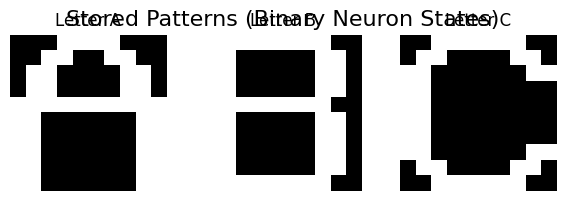

In [2]:
# Generate letter patterns
patterns = generate_letters(['A', 'B', 'C'], size=10)
print(f"Generated {len(patterns)} patterns")
print(f"Each pattern has {patterns.shape[1]} neurons (10x10 grid)")
print(f"Values: {np.unique(patterns)} (firing=+1, silent=-1)")

# Visualize
fig = plot_multiple_patterns(patterns, (10, 10), 
                            titles=['Letter A', 'Letter B', 'Letter C'],
                            n_cols=3)
plt.suptitle('Stored Patterns (Binary Neuron States)', fontsize=16)
plt.show()

### Exploratory Analysis: Pattern Similarity

**Key Insight:** If patterns are too similar, their energy valleys will overlap → network confuses them!

Pattern Similarity Matrix (normalized overlap):
[[1.   0.36 0.2 ]
 [0.36 1.   0.52]
 [0.2  0.52 1.  ]]

Interpretation:
  1.0 = identical patterns
  0.0 = orthogonal (no overlap)
 -1.0 = opposite patterns


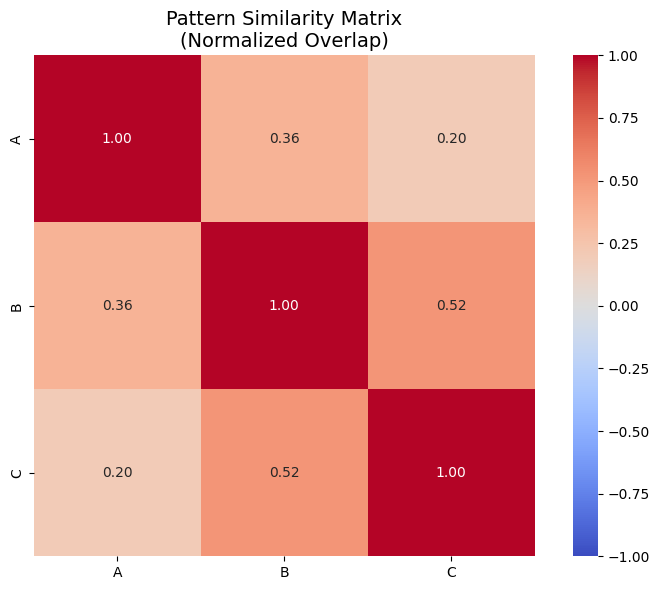

In [3]:
# Compute similarity matrix
similarity = compute_pattern_similarity_matrix(patterns)
print("Pattern Similarity Matrix (normalized overlap):")
print(similarity)
print("\nInterpretation:")
print("  1.0 = identical patterns")
print("  0.0 = orthogonal (no overlap)")
print(" -1.0 = opposite patterns")

# Visualize
fig = plot_pattern_similarity_matrix(similarity, ['A', 'B', 'C'])
plt.show()

---
## Part 2: Train the Network (Hebbian Learning)

**Brain Analogy:** *"Neurons that fire together, wire together"*

The Hebbian rule strengthens connections between neurons that are co-active in stored patterns.

Network trained!
Weight matrix shape: (100, 100)
Average synaptic strength: 0.0169
Number of stored patterns: 3


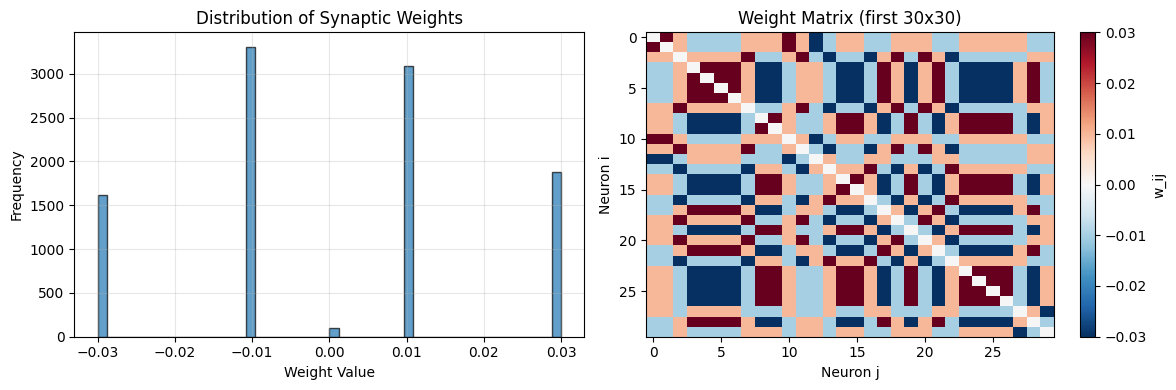

In [4]:
# Create and train network
hopfield = HopfieldNetwork(n_neurons=100)
hopfield.train(patterns)

print("Network trained!")
print(f"Weight matrix shape: {hopfield.weights.shape}")
print(f"Average synaptic strength: {np.mean(np.abs(hopfield.weights)):.4f}")
print(f"Number of stored patterns: {len(patterns)}")

# Show weight statistics
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of weights
axes[0].hist(hopfield.weights.flatten(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Weight Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Synaptic Weights')
axes[0].grid(True, alpha=0.3)

# Weight matrix visualization (small sample)
sample_size = 30
im = axes[1].imshow(hopfield.weights[:sample_size, :sample_size], 
                   cmap='RdBu_r', aspect='auto')
axes[1].set_title(f'Weight Matrix (first {sample_size}x{sample_size})')
axes[1].set_xlabel('Neuron j')
axes[1].set_ylabel('Neuron i')
plt.colorbar(im, ax=axes[1], label='w_ij')

plt.tight_layout()
plt.show()

---
## Part 3: Test Memory Retrieval

**Brain Analogy:** *"Hear a few notes, recall the whole song"*

We add noise to a pattern and see if the network can recover the original.

In [5]:
# Choose pattern to test (Letter A)
original = patterns[0]

# Add noise
noise_level = 0.25  # 25% of bits flipped
noisy = hopfield.add_noise(original, noise_level=noise_level)

print(f"Original pattern: Letter A")
print(f"Noise level: {int(noise_level*100)}%")
hamming_before = hopfield.hamming_distance(noisy, original)
print(f"Bits flipped: {hamming_before} / 100")
print()

# Retrieve
print("Running network dynamics (energy minimization)...")
retrieved, info = hopfield.retrieve(noisy, max_iter=50, record_trajectory=True)

# Check result
hamming_after = hopfield.hamming_distance(retrieved, original)
success = np.array_equal(retrieved, original)

print(f"Converged in: {info['iterations']} iterations")
print(f"Final Hamming distance: {hamming_after}")
print(f"Retrieval: {'SUCCESS ✓' if success else 'FAILED ✗'}")
print()

if success:
    print("🎵 Like recalling a song from a few notes! 🎵")
else:
    print("Too much noise - network couldn't recover original pattern.")

Original pattern: Letter A
Noise level: 25%
Bits flipped: 25 / 100

Running network dynamics (energy minimization)...
Converged in: 2 iterations
Final Hamming distance: 0
Retrieval: SUCCESS ✓

🎵 Like recalling a song from a few notes! 🎵


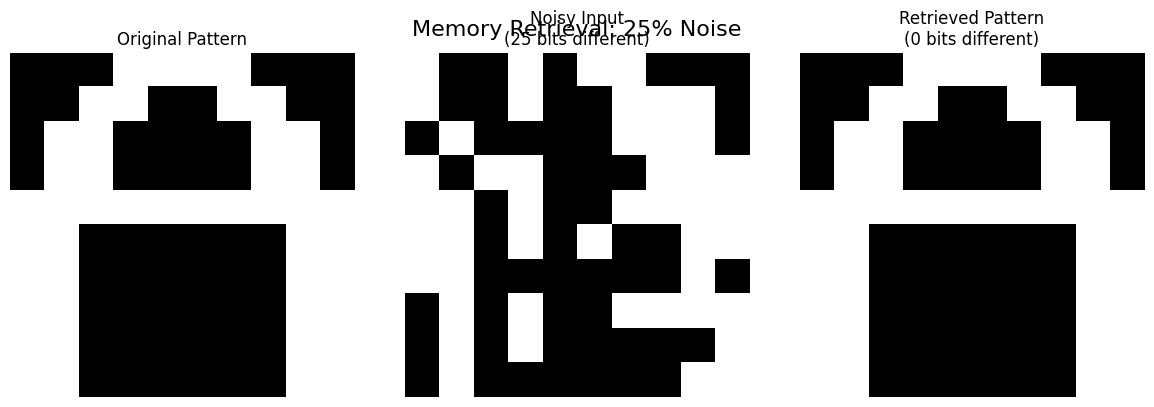

In [6]:
# Visualize retrieval process
fig = plot_retrieval_sequence(original, noisy, retrieved, (10, 10),
                             hamming_before, hamming_after)
fig.suptitle(f"Memory Retrieval: {int(noise_level*100)}% Noise", fontsize=16)
plt.show()

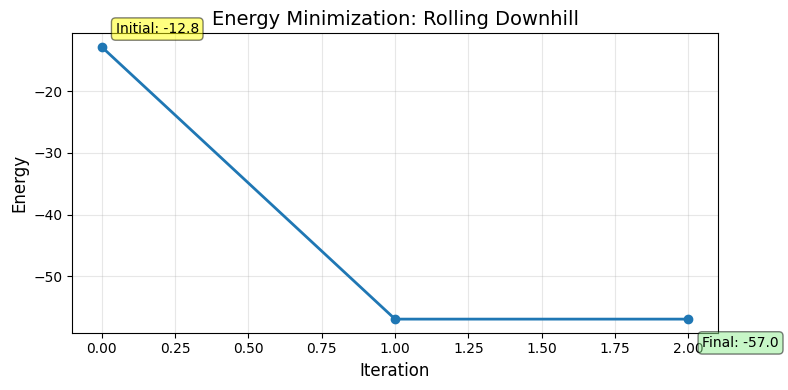


💡 Key Insight:
Energy decreases during retrieval - the system 'rolls downhill'
into the nearest energy valley (stored memory).


In [7]:
# Plot energy trajectory
fig = plot_energy_trajectory(info['energy_trajectory'], 
                            "Energy Minimization: Rolling Downhill")
plt.show()

print("\n💡 Key Insight:")
print("Energy decreases during retrieval - the system 'rolls downhill'")
print("into the nearest energy valley (stored memory).")

---
## Part 4: Interactive Experiments

Try changing these parameters to explore network behavior!

Noise 10%: Accuracy = 100.0%
Noise 20%: Accuracy = 100.0%
Noise 30%: Accuracy = 90.0%
Noise 40%: Accuracy = 60.0%
Noise 50%: Accuracy = 0.0%


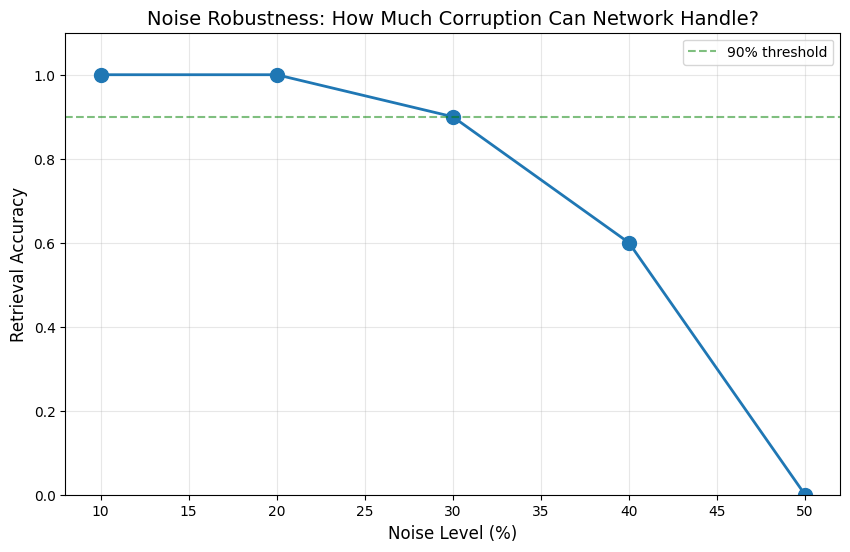


🧠 Brain Analogy:
Like human memory, the network tolerates some corruption but
eventually fails when input is too degraded!


In [8]:
# Experiment: Test different noise levels
noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5]
successes = []

for noise in noise_levels:
    # Test retrieval 10 times for each noise level
    trials = 10
    success_count = 0
    
    for _ in range(trials):
        noisy = hopfield.add_noise(original, noise_level=noise)
        retrieved, _ = hopfield.retrieve(noisy, max_iter=50)
        if np.array_equal(retrieved, original):
            success_count += 1
    
    accuracy = success_count / trials
    successes.append(accuracy)
    print(f"Noise {int(noise*100):2d}%: Accuracy = {accuracy:.1%}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.array(noise_levels)*100, successes, 'o-', linewidth=2, markersize=10)
plt.xlabel('Noise Level (%)', fontsize=12)
plt.ylabel('Retrieval Accuracy', fontsize=12)
plt.title('Noise Robustness: How Much Corruption Can Network Handle?', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1.1])
plt.axhline(y=0.9, color='g', linestyle='--', alpha=0.5, label='90% threshold')
plt.legend()
plt.show()

print("\n🧠 Brain Analogy:")
print("Like human memory, the network tolerates some corruption but")
print("eventually fails when input is too degraded!")

---
## Part 5: Capacity Test

**Question:** How many patterns can the network store reliably?

**Theory:** ~0.138N patterns (for N=100, that's about 14 patterns)

Testing 2 patterns... Accuracy: 100.0%
Testing 5 patterns... Accuracy: 100.0%
Testing 10 patterns... Accuracy: 100.0%
Testing 15 patterns... Accuracy: 53.3%
Testing 20 patterns... Accuracy: 50.0%
Testing 25 patterns... Accuracy: 0.0%


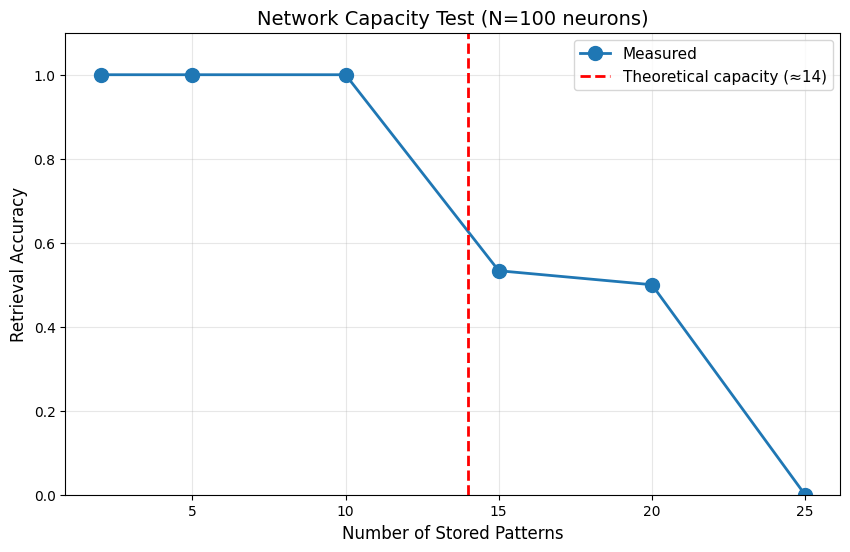


🌄 Energy Landscape Analogy:
When too many patterns are stored, energy valleys overlap.
The network starts confusing memories or creates false ones!


In [9]:
from src.patterns import generate_random_patterns

# Test different numbers of patterns
pattern_counts = [2, 5, 10, 15, 20, 25]
accuracies = []

for n_patterns in pattern_counts:
    print(f"Testing {n_patterns} patterns...", end=" ")
    
    # Generate random patterns
    test_patterns = generate_random_patterns(n_patterns, 100)
    
    # Train network
    test_network = HopfieldNetwork(n_neurons=100)
    test_network.train(test_patterns)
    
    # Test retrieval
    successes = 0
    for pattern in test_patterns:
        noisy = test_network.add_noise(pattern, noise_level=0.15)
        retrieved, _ = test_network.retrieve(noisy, max_iter=50)
        if np.array_equal(retrieved, pattern):
            successes += 1
    
    accuracy = successes / n_patterns
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.1%}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(pattern_counts, accuracies, 'o-', linewidth=2, markersize=10, label='Measured')
plt.axvline(x=14, color='r', linestyle='--', linewidth=2, label='Theoretical capacity (≈14)')
plt.xlabel('Number of Stored Patterns', fontsize=12)
plt.ylabel('Retrieval Accuracy', fontsize=12)
plt.title('Network Capacity Test (N=100 neurons)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.ylim([0, 1.1])
plt.show()

print("\n🌄 Energy Landscape Analogy:")
print("When too many patterns are stored, energy valleys overlap.")
print("The network starts confusing memories or creates false ones!")

---
## Summary: The Three-Act Structure

### Act I: From Proteins to Energy Landscapes
- Nature optimizes by rolling downhill in energy landscapes
- Proteins fold into stable configurations (valleys)
- Brain memories as neural attractor states

### Act II: Building from Simple Rules
1. **Neurons**: Binary units (+1 = firing, -1 = silent)
2. **Hebbian Learning**: "Fire together, wire together"
3. **Dynamics**: Energy minimization (rolling downhill)
4. **Retrieval**: Associative memory (partial → complete)

### Act III: Experiments & Insights
- **Capacity**: ~0.138N patterns (verified!)
- **Noise tolerance**: ~25-30% corruption
- **Failure modes**: Spurious attractors (false memories)
- **Modern connection**: Transformers use similar principles!

---

## 🎓 Key Takeaways

1. **Simple local rules → complex emergent behavior**
2. **Biology inspires powerful computational models**
3. **Energy minimization as universal principle**
4. **Memory as attractor dynamics in state space**

**2024 Nobel Prize in Physics** awarded to Hopfield and Hinton for these foundational ideas! 🏆

---
## Your Turn: Experiment!

Try these challenges:

1. **Store more letters** (D, E, F) and test capacity
2. **Create custom patterns** (draw your own binary images)
3. **Find spurious attractors** (run with many random initializations)
4. **Vary network size** (50, 100, 200 neurons)
5. **Implement synchronous updates** (compare to asynchronous)

Have fun exploring! 🧠✨